# Chapter 12: Discriminant Analysis


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - dmba: 0.0.12
>   - matplotlib: 3.2.0
>   - numpy: 1.18.1
>   - pandas: 1.0.1
>   - scikit-learn: 0.22.2
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# Import required packages for this chapter
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt

from dmba import classificationSummary
from dmba import gainsChart, liftChart

%matplotlib inline

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 12.1: Personal Loan Acceptance
Universal Bank is a relatively young bank growing
rapidly in terms of overall customer acquisition. The majority of
these customers are liability customers with varying sizes of
relationship with the bank. The customer base of asset customers is
quite small, and the bank is interested in expanding this base
rapidly to bring in more loan business. In particular, it wants to
explore ways of converting its liability customers to personal loan
customers.

A campaign the bank ran for liability customers last year showed a
healthy conversion rate of over 9\% successes. This has encouraged the
retail marketing department to devise smarter campaigns with better
target marketing. The goal of our analysis is to model the previous
campaign's customer behavior to analyze what combination of factors
make a customer more likely to accept a personal loan. This will serve
as the basis for the design of a new campaign.

The file _UniversalBank.csv_ contains data on 5000 customers. The data include customer demographic information (e.g., age, income), the customer's relationship with the bank (e.g., mortgage, securities account), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6\%)
accepted the personal loan that was offered to them in the previous campaign.

Partition the data (60\% training and 40\% validation) and then perform a discriminant analysis that models Personal Loan as a function of the remaining predictors (excluding zip code). Remember to turn categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (personal loan acceptance), and use the default cutoff value of 0.5.



In [3]:
bank_df = pd.read_csv(DATA / 'UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Drop ID and zip code columns
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Use one-hot-encoding for Education
X = bank_df.drop(columns=['Personal Loan'])
X = pd.get_dummies(X, columns=['Education'], drop_first=True)

y = bank_df['Personal Loan']
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_2', 'Education_3'],
      dtype='object')

In [5]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (3000, 12) Validation set: (2000, 12)


In [6]:
da_class = LinearDiscriminantAnalysis()
da_class.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Problem 12.1.a
Compute summary statistics for the predictors separately for loan acceptors and nonacceptors. For continuous predictors, compute the mean and standard deviation. For categorical predictors, compute the percentages. Are there predictors where the two classes differ substantially?

In [7]:
bank_df[y==1].describe().loc[['mean', 'std'],:]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
mean,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820


In [8]:
bank_df[y==0].describe().loc[['mean', 'std'],:]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
mean,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,11.450427,11.456672,40.578534,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454


For the predictor "income" the mean is much higher for acceptors than for 
nonacceptors. Similarly for "CCAverage" and "Mortgage," the mean is higher 
for acceptors than for nonacceptors.

Categorical predictors:  "acceptors" are more likely to have higher level 
degrees (Education levels 2 and 3, graduate and professional), and more likely
to have CD accounts.

## Problem 12.1.b
Examine the model performance on the validation set.
## Problem 12.1.b.i
What is the accuracy rate?

In [9]:
classificationSummary(valid_y, da_class.predict(valid_X))

Confusion Matrix (Accuracy 0.9480)

       Prediction
Actual    0    1
     0 1777   30
     1   74  119


The accuracy of the discriminant analysis model is 94.8%.

## Problem 12.1.b.ii
Is one type of misclassification more likely than the other?

Yes - the number of cases of actual acceptors classified as nonacceptors is 
much higher than the number of cases of nonacceptors classified as acceptors.

## Problem 12.1.b.iii
Select three customers who were misclassified as _acceptors_ and three who were misclassified as _nonacceptors_. The goal is to determine why they are misclassified. First, examine their probability of being classified as acceptors: is it close to the
threshold of 0.5? If not, compare their predictor values to the summary statistics of the two classes to determine why they were misclassified.

In [10]:
# combine valid_X with actual value (valid_y) and predicted probability
success_probability = da_class.predict_proba(valid_X)[:,1]
mergedData = pd.concat(
    [
        valid_X, 
        pd.DataFrame({'actual': valid_y}, index=valid_X.index),
        pd.DataFrame({'prob': success_probability}, index=valid_X.index),
    ], axis=1, ignore_index=False, sort=False)  
mergedData = mergedData.sort_values(by='prob')

# loan acceptors misclassified as non-acceptors
mis_acceptors = mergedData[mergedData.actual == 1].head(3)
mis_acceptors

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,actual,prob
1577,34,8,65,1,3.0,227,0,0,1,0,0,0,1,0.000263
349,26,2,60,2,3.0,132,0,0,0,0,0,0,1,0.000602
2158,50,25,83,4,3.1,0,0,0,0,1,0,0,1,0.003128


The probabilities are less than 0.5, many not even close to that threshold.
Looking at customer ID 1577, we can see that their profile is similar to that of 
a nonacceptor. They have few existing lines of business with the bank 
(no securities account, no CD account, no credit card.). This is a case 
of the customer not behaving in the way that similar customers behave.

In [11]:
# loan nonacceptors misclassified as acceptors
mis_nonacceptors = mergedData[mergedData.actual == 0].tail(3)
mis_nonacceptors

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,actual,prob
4937,33,8,162,1,8.6,0,0,1,1,1,0,0,0,0.980754
785,46,22,164,2,7.6,0,0,1,1,1,0,0,0,0.990423
2305,32,7,185,2,6.7,0,0,1,1,1,0,0,0,0.995511


Probabilities are greater than 0.5, and not close to the threshold. Looking 
at the customer for ID 2305, we see that he has the demographic profile of an
acceptor for most relevant variables (income, ccaverage). He is 
missing some of the "doing business with the bank already" attributes 
(Securities Acccount), but, overall, the customer 
profile is that of an acceptor, so it is a case of the customer not behaving
in the way that similar customers behave.


## Problem 12.1.c
As in many marketing campaigns, it is more important to identify customers who will accept the offer rather than customers who will not accept it. Therefore, a good model should be especially accurate at detecting acceptors. Examine the lift chart and decile-wise lift chart for the validation set and interpret them in light of this ranking goal.

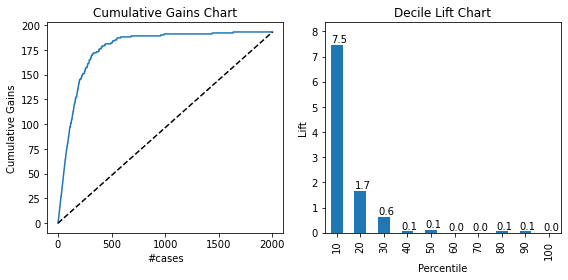

In [12]:
proba = da_class.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': da_class.predict(valid_X) })
result = result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = gainsChart(result.actual, ax=axes[0])
ax.set_ylabel('Cumulative Gains')
ax.set_xlabel('#cases')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(result.actual, ax=axes[1], labelBars=True)

plt.tight_layout()
plt.show()

Using the lift chart we can descend through the customers in order of 
probability of being a loan acceptor, knowing at each point how effective we 
have been in "skimming the cream" (acceptors).
The decile chart is similar, differing only in that it proceeds in chunks of 
10% of the data. From the decile chart we can see that taking the 10% of the 
records that are ranked by the model as "most probable acceptors" yields 7.5
times as many "acceptors" as would simply selecting 10% of the records at 
random. 

## Problem 12.1.d
Compare the results from the discriminant analysis with those from a logistic regression (both with cutoff 0.5 and the same predictors). Examine the confusion matrices, the lift charts, and the decile charts. Which method performs better on your validation set in detecting the acceptors?

We can take the confusion matrix from the logistic regression model in chapter 10.
```
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128
```

Discriminant analysis correctly classifies 115 of the acceptors, 
logistic regression 128. Therefore the logistic regression's error rate in 
detecting acceptors is lower than that of discriminant analysis.

Decile chart of logistic regression: taking 10% of the records that are 
ranked by the model as "most probable acceptors" yields 7.8 times as many 
"acceptors" as would simply selecting 10% of the records at random.
Decile chart of discriminant analysis: taking 10% of the records that are 
ranked by the model as "most probable acceptors" yields 7.5 times as many 
"acceptors" as would simply selecting 10% of the records at random.
Therefore logistic regression performs slightly better than discriminant 
analysis in detecting acceptors for validation data.

## Problem 12.1.e
The bank is planning to continue its campaign by sending its offer to 1000 additional customers. Suppose that the cost of sending the offer is \\$1 and the profit from an accepted offer is \\$50. What is the expected profitability of this campaign?


In [13]:
print(train_y.value_counts())

print('probability of accepting the loan', 287 / (287 + 2713))
print('expected profitability ', 96 * 50 - 1000)

0    2713
1     287
Name: Personal Loan, dtype: int64
probability of accepting the loan 0.09566666666666666
expected profitability  3800


The probability of acceptance of a loan = 0.0957 (prior class probability). 
Out of 1000 customers 9.57% (that is 96) can be expected to accept the loan
offer.

Profit from each accepted offer = $50.

Total expected profitability is:

profit from these 101 customers - the cost of sending an offer.

Therefore total expected profitability = 96*50 - 1000 = 3800

Expected profitability from this campaign is \\$3850.

## Problem 12.1.f
The cost of misclassifying a loan acceptor customer as a nonacceptor is much higher than the opposite misclassification cost. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

If the cutoff were lowered, then we would classify more "non acceptors" cases 
as "acceptors" cases (more zeros misclassified as 1).

This means that the numerator in the classification error rate for truly 
completed will be less than or equal to b. Therefore, lowering the cutoff
will lead to a reduced (or equal) classification error rate for truly 
acceptor cases.

Therefore, if the cutoff is lowered, then

1. It will classify more nonacceptors as acceptors.
2. It will minimize the expected cost of misclassification.

# Problem 12.2: Identifying Good System Administrators
A management consultant is studying the roles played by experience and training in a system administrator's ability to complete a set of tasks in a specified amount of time. In particular, she is interested in discriminating between administrators who are able to complete given tasks within a specified time and those who are not. Data are collected on the performance of 75 randomly selected administrators. They are stored in the file  _SystemAdministrators.csv_.

Using these data, the consultant performs a discriminant analysis. The variable Experience measures months of full time system administrator experience, while Training measures number of relevant training credits. The dependent variable Completed is either _Yes_ or _No_, according to whether or not the administrator completed the tasks.

In [14]:
data = pd.read_csv(DATA / 'SystemAdministrators.csv')
data.head()

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


## Problem 12.2.a
Create a scatter plot of Experience vs. Training using color or symbol to differentiate administrators who completed the tasks from those who did not complete them. See if you can identify a line that separates the two classes with minimum misclassification.

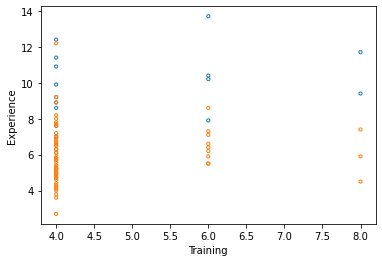

In [15]:
ax = data[data['Completed task'] == 'Yes'].plot.scatter(x='Training', y='Experience', c='none',
                                                        facecolors='none', edgecolors='C0', s=10)
data[data['Completed task'] == 'No'].plot.scatter(x='Training', y='Experience', c='none',
                                                  facecolors='none', edgecolors='C1', s=10, ax=ax)
plt.show()

From the scatterplot we can observe that programmers who completed the task 
tend to have more experience. Training, however, does not play much a role in 
task completion. Therefore, the predictor Experience appears more useful for 
classifying task completion.


## Problem 12.2.b
Run a discriminant analysis with both predictors using the entire dataset as training data.  Among those who completed the tasks, what is the percentage of administrators who are classified incorrectly as failing to complete the tasks?

In [16]:
predictors = ['Training', 'Experience']
outcome = 'Completed task'

X = data[predictors]
y = data[outcome]

da = LinearDiscriminantAnalysis()
da.fit(X, y)

classificationSummary(y, da.predict(X))

Confusion Matrix (Accuracy 0.9067)

       Prediction
Actual  0  1
     0 58  2
     1  5 10


Among 15 administrators who completed the task, 5 are misclassified as 
failing to complete the task.

Therefore, the percentage of administrators who completed the task but were 
misclassified as failing to complete the task is 33.33%.

## Problem 12.2.c
Compute the two classification scores for an administrator with 4 months of experience and six credits of training. Based on these, how would you classify this administrator?

In [17]:
admin = pd.DataFrame([{'Training': 6.0, 'Experience': 4}])
print(da.predict(admin[predictors]))
da.predict_proba(admin[predictors])

['No']


array([[9.99052428e-01, 9.47571894e-04]])

The classification score for class "No" is more than that for class "Yes".
Therefore, we classify the administrator as "fail to complete the task."

## Problem 12.2.d
How much experience must be accumulated by an administrator with four training credits before his or her estimated probability of completing the tasks exceeds 0.5?

In [18]:
for experience in range(3, 14):
    admin = pd.DataFrame([{'Training': 4, 'Experience': experience}])
    print(f'Experience {experience}: {da.predict_proba(admin[predictors])[0][1]:.3f}')

Experience 3: 0.000
Experience 4: 0.001
Experience 5: 0.003
Experience 6: 0.013
Experience 7: 0.051
Experience 8: 0.187
Experience 9: 0.494
Experience 10: 0.805
Experience 11: 0.946
Experience 12: 0.987
Experience 13: 0.997


he administrator must accumulate more than 9 years experience with 4 
training credits so that his/her estimated probability of completing the task
exceeds 0.5.



## Problem 12.2.e
Compare the classification accuracy of this model to that resulting from a logistic regression with cutoff 0.5.

In [19]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X, y)
classificationSummary(y, logit_reg.predict(X))

Confusion Matrix (Accuracy 0.9067)

       Prediction
Actual  0  1
     0 58  2
     1  5 10


Among 15 administrators who completed task, 5 are misclassified as failing to 
complete the task. Therefore percentage of administrators who completed the
task but were misclassified as failing to complete the task is 33.33%.

Therefore, the results from both discriminant analysis and logistic regression are the same.

# Problem 12.3: Detecting Spam E-mail (from the UCI Machine Learning Repository)
A team at Hewlett-Packard collected data on a large number of e-mail messages from their postmaster and personal e-mail for the purpose of finding a classifier that can separate e-mail messages that are _spam_ vs. _nonspam_ (a.k.a. 'ham'). The spam concept is diverse: It includes advertisements for products or websites, 'make money fast' schemes, chain letters, pornography, and so on. The definition used here is 'unsolicited commercial e-mail.' The file _Spambase.csv_ contains information on 4601 e-mail messages, among which 1813 are tagged 'spam.' The predictors include 57 attributes, most of them are the average number of times a certain word (e.g., mail, George) or symbol (e.g., \#, !) appears in the e-mail. A few predictors are
related to the number and length of capitalized words.

## Problem 12.3.a
To reduce the number of predictors to a manageable size, examine how each predictor differs between the _spam_ and _nonspam_ e-mails by comparing the spam-class average and nonspam-class average. Which are the 11 predictors that appear to vary the most between _spam_ and _nonspam_ e-mails? From these 11, which words or signs occur more often in spam?

In [20]:
data = pd.read_csv(DATA / 'Spambase.csv')
data.head()
data.columns

Index(['make', 'address', 'all', 'W_3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will ', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you ', 'credit', 'your', 'font', 'W_000',
       'money', 'hp', 'hpl', 'george', 'W_650', 'lab', 'labs', 'telnet',
       'W_857', 'data', 'W_415', 'W_85', 'technology', 'W_1999', 'parts', 'pm',
       'direct', 'cs', 'meeting', 'original', 'project ', 're:', 'edu',
       'table ', 'conference', 'C;', 'C(', 'C[', 'C!', 'C$', 'C#', 'CAP_avg',
       'CAP_long', 'CAP_tot', 'Spam'],
      dtype='object')

In [21]:
spamData = data[data.Spam == 1]
nonspamData = data[data.Spam == 0]

# determine absolute difference between spam-class average and nonspam-class average for each of the variables
difference = spamData.mean() - nonspamData.mean()
print(difference.sort_values(ascending=False).head(9))
absDifference = abs(difference)

# Get the 10 values with the largest absolute difference in mean
absDifference.sort_values(ascending=False).head(12)

CAP_tot     309.148468
CAP_long     86.178780
CAP_avg       7.141864
Spam          1.000000
you           0.994199
your          0.941668
free          0.444775
C!            0.403729
our           0.332915
dtype: float64


CAP_tot     309.148468
CAP_long     86.178780
CAP_avg       7.141864
george        1.263716
Spam          1.000000
you           0.994199
your          0.941668
hp            0.877994
free          0.444775
hpl           0.422822
C!            0.403729
our           0.332915
dtype: float64

The following 11 predictors appear to vary most between spam and non-spam.
> our, C!, hpl, free, hp, your, you, george, CAP_avg, CAP_long, CAP_tot

Which of these occur more often in spam?
> our, C!, free, your, you, CAP_avg, CAP_long, CAP_tot


## Problem 12.3.b
Partition the data into training and validation sets, then perform a discriminant analysis on the training data using only the 11 predictors.

In [22]:
predictors = ['our', 'C!', 'hpl', 'free', 'hp', 'your', 'you ', 'george', 'CAP_avg', 'CAP_long', 'CAP_tot']
outcome = 'Spam'

# create training and validation sets
X = data[predictors]
y = data[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

da_class = LinearDiscriminantAnalysis()
da_class.fit(train_X, train_y)

Training set: (2760, 11) Validation set: (1841, 11)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Problem 12.3.c
If we are interested mainly in detecting spam messages, is this model useful? Use the confusion matrix, lift chart, and decile chart for the validation set for the evaluation.

In [23]:
classificationSummary(valid_y, da_class.predict(valid_X))
print(f'{239 + 504} spam message, error rate {239 / (504 + 239) * 100:.2f}')

Confusion Matrix (Accuracy 0.8332)

       Prediction
Actual    0    1
     0 1030   68
     1  239  504
743 spam message, error rate 32.17


Among the 743 spam messages, 239 are misclassified as non-spam. Therefore the
error rate is 32.17%, which is moderately high.

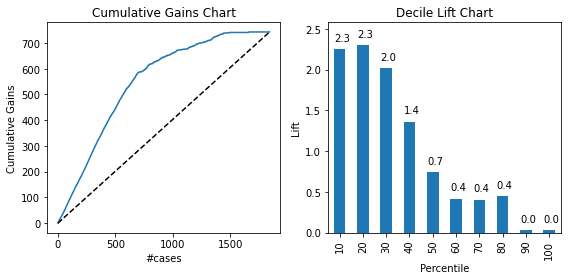

In [24]:
proba = da_class.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': da_class.predict(valid_X) })
result = result.sort_values(by=['p(1)'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = gainsChart(result.actual, ax=axes[0])
ax.set_ylabel('Cumulative Gains')
ax.set_xlabel('#cases')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(result.actual, ax=axes[1], labelBars=True)

plt.tight_layout()
plt.show()

From the decile chart: if we take 10% of the records that are ranked by the 
model as "most probable spam", it captures 2.3 times more "spam" messages 
than simply selecting 10% of the records at random.

## Problem 12.3.d
In the sample, almost 40\% of the e-mail messages were tagged as spam. However, suppose that the actual proportion of spam messages in these e-mail accounts is 10\%. Compute the constants of the classification functions to account for this information.

The constant in the classification function of `da_class` is given as:

In [25]:
print(f'The constant of the classification function is: {da_class.intercept_}')
print(f'The priors of the classification function are: {da_class.priors_}')

The constant of the classification function is: [-2.07053468]
The priors of the classification function are: [0.61231884 0.38768116]


If we want to calculate the constant for a different prior, we need to determine first the log-differences in the priors and then adjust the constant.

In [26]:
log_priors = np.log(da_class.priors_)
log_priors_10 = np.log([0.9, 0.1])
diff_log_priors = log_priors[1] - log_priors[0]
diff_log_priors_10 = log_priors_10[1] - log_priors_10[0]
print(f'Difference of log-prior of classification function: {diff_log_priors}')
print(f'Difference of log-prior of classification function for new priors: {diff_log_priors_10}')

adjusted_intercept = da_class.intercept_ - diff_log_priors + diff_log_priors_10
print(f'Adjusted intercept for new priors: {adjusted_intercept}')

Difference of log-prior of classification function: -0.45706988046116737
Difference of log-prior of classification function for new priors: -2.197224577336219
Adjusted intercept for new priors: [-3.81068937]


The `LinearDiscriminantAnalysis` implementation in _scikit-learn_ allows specifying the priors directly. We can confirm the correctness of our calculation above using this.

In [27]:
da_class_10 = LinearDiscriminantAnalysis(priors = [0.9, 0.1])
da_class_10.fit(train_X, train_y)
classificationSummary(valid_y, da_class_10.predict(valid_X))

print(da_class_10.intercept_)

Confusion Matrix (Accuracy 0.6594)

       Prediction
Actual    0    1
     0 1086   12
     1  615  128
[-3.81068937]


## Problem 12.3.e
A spam filter that is based on your model is used, so that only messages that are classified as _nonspam_ are delivered, while messages that are classified as _spam_ are quarantined. In this case, misclassifying a nonspam e-mail (as spam) has much heftier results. Suppose that the cost of quarantining a nonspam e-mail is 20 times
that of not detecting a spam message. Compute the constants of the classification functions to account for these costs (assume that the proportion of spam is reflected correctly by the sample proportion).

In [28]:
log_priors = np.log(da_class.priors_)
diff_log_priors = log_priors[1] - log_priors[0]
print(f'Difference of log-prior of classification function: {diff_log_priors}')

# Adjust intercept using the log of the cost-ratio
adjusted_intercept = da_class.intercept_ - np.log(20)
print(f'Intercept before adjustment {da_class.intercept_}')
print(f'Adjusted intercept including cost: {adjusted_intercept}')

Difference of log-prior of classification function: -0.45706988046116737
Intercept before adjustment [-2.07053468]
Adjusted intercept including cost: [-5.06626695]


For the `LinearDiscriminantAnalysis` implementation in _scikit-learn_ it is better to adjust the priors to take the misclassification costs into account.

In [29]:
K = 20
print(f'Ratio of costs (q1/q2): {K}')

priorNonspam = da_class.priors_[0]
priorSpam = da_class.priors_[1]
adjPriorNonspam = priorNonspam * K / (priorNonspam * K + priorSpam)
adjPriorSpam = priorSpam / (priorNonspam * K + priorSpam)

print(f'Adjusted prior of nonspam: {adjPriorNonspam}')
print(f'Adjusted prior of spam: {adjPriorSpam}')

Ratio of costs (q1/q2): 20
Adjusted prior of nonspam: 0.9693145970748495
Adjusted prior of spam: 0.03068540292515056


In [30]:
da_class_spam = LinearDiscriminantAnalysis(priors = [adjPriorNonspam, adjPriorSpam])
da_class_spam.fit(train_X, train_y)
classificationSummary(valid_y, da_class_spam.predict(valid_X))
da_class_spam.intercept_

Confusion Matrix (Accuracy 0.6122)

       Prediction
Actual    0    1
     0 1092    6
     1  708   35


array([-5.06626695])

We can see that adjusting the priors leads to a model which predicts fewer _nonspam_ messages as _spam_.